In [ ]:
#Install Required Library

In [60]:
#Import Required Library

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [61]:
df = pd.read_pickle('df_min.pickle')

In [62]:
#Cutoff

cutoff_date = '2019-01-01'
df = df[df['Date'] >= cutoff_date]
df.reset_index(drop=True, inplace=True)

In [63]:
#Resample to required the time interval

# Resample the data into 30-minute intervals based on the 'Date' column without changing the index
df_30 = df.resample('30T', on='Date').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Drop rows with NaN values (if any)
df_30.dropna(inplace=True)
df_30['Date'] = df_30.index
df_30.reset_index(drop=True, inplace=True)


df_hourly = df.resample('1H', 
on='Date').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Drop rows with NaN values (if any)
df_hourly.dropna(inplace=True)
df_hourly['Date'] = df_hourly.index
df_hourly.reset_index(drop=True, inplace=True)

df_daily = df.resample('1D', on='Date').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last'
})

# Drop rows with NaN values (if any)
df_daily.dropna(inplace=True)
df_daily['Date'] = df_daily.index
df_daily.reset_index(drop=True, inplace=True)


In [64]:
df_30

,Open,High,Low,Close,Date
0,1742.0,1748.0,1731.0,1739.0,2020-01-06 00:00:00
1,1739.0,1741.0,1717.0,1727.0,2020-01-06 00:30:00
2,1726.0,1728.0,1723.0,1724.0,2020-01-06 01:00:00
3,1725.0,1731.0,1722.0,1722.0,2020-01-06 01:30:00
4,1722.0,1730.0,1721.0,1729.0,2020-01-06 02:00:00
...,...,...,...,...,...
9475,1604.0,1607.0,1599.0,1607.0,2023-11-17 03:30:00
9476,1607.0,1608.0,1599.0,1599.5,2023-11-17 04:00:00
9477,1599.5,1605.0,1599.0,1604.5,2023-11-17 04:30:00
9478,1605.0,1607.5,1603.0,1603.5,2023-11-17 05:00:00


In [65]:
df_30.columns

Index(['Open', 'High', 'Low', 'Close', 'Date'], dtype='object')

In [66]:
#Function for Returns

def treturn(input_df):
    input_df['Return'] = (input_df['Close'] / input_df['Close'].shift(1)) - 1 
    input_df.fillna(0, inplace = True)

    return(input_df)

In [67]:
#Returns

df = treturn(df)
df_30 = treturn(df_30)
df_hourly = treturn(df_hourly)
df_daily = treturn(df_daily)

In [68]:
#Moving Average

# For the main DataFrame 'df'
df = df.copy()
# df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

# For df_30 (assuming it's another DataFrame)
df_30 = df_30.copy()
# df_30['50_MA'] = df_30['Close'].rolling(window=50).mean()
df_30['200_MA'] = df_30['Close'].rolling(window=200).mean()

# For df_hourly (assuming it's another DataFrame)
df_hourly = df_hourly.copy()
# df_hourly['50_MA'] = df_hourly['Close'].rolling(window=50).mean()
df_hourly['200_MA'] = df_hourly['Close'].rolling(window=200).mean()

# For df_daily (assuming it's another DataFrame)
df_daily = df_daily.copy()
# df_daily['50_MA'] = df_daily['Close'].rolling(window=50).mean()
df_daily['200_MA'] = df_daily['Close'].rolling(window=200).mean()


In [69]:
#Cut off date prior to trading

cutoff_date = '2022-01-01'
df = df[df['Date'] >= cutoff_date]
df_30 = df_30[df_30['Date'] >= cutoff_date]
df_hourly = df_hourly[df_hourly['Date'] >= cutoff_date]
df_daily = df_daily[df_daily['Date'] >= cutoff_date]

df.reset_index(drop=True, inplace=True)


In [70]:

# date_ma_30_mapping = df_30.set_index('Date')['50_MA'].to_dict()
# df['50_MA_30'] = df['Date'].map(date_ma_30_mapping)
# df['50_MA_30'] = df['50_MA_30'].fillna(method='ffill')

# date_ma_hourly_mapping = df_hourly.set_index('Date')['50_MA'].to_dict()
# df['50_MA_H'] = df['Date'].map(date_ma_hourly_mapping)
# df['50_MA_H'] = df['50_MA_H'].fillna(method='ffill')

# date_ma_mapping = df_daily.set_index('Date')['50_MA'].to_dict()
# df['50_MA_D'] = df['Date'].dt.date.map(date_ma_mapping)


In [71]:
df

,Date,Close,Open,High,Low,Return,200_MA
0,2022-01-04 00:00:00,978.0,975.0,980.0,972.0,0.017690,963.2500
1,2022-01-04 00:01:00,975.0,976.0,978.0,975.0,-0.003067,963.2950
2,2022-01-04 00:02:00,977.0,976.0,977.0,973.0,0.002051,963.3500
3,2022-01-04 00:03:00,975.0,976.0,976.0,975.0,-0.002047,963.3900
4,2022-01-04 00:04:00,973.0,975.0,976.0,973.0,-0.002051,963.4050
...,...,...,...,...,...,...,...
130850,2023-11-17 05:55:00,1610.5,1611.5,1612.0,1609.5,-0.000621,1603.7625
130851,2023-11-17 05:56:00,1610.0,1610.5,1610.5,1609.0,-0.000310,1603.7925
130852,2023-11-17 05:57:00,1609.5,1610.0,1610.5,1609.0,-0.000311,1603.8225
130853,2023-11-17 05:58:00,1609.0,1609.5,1610.0,1608.5,-0.000311,1603.8525


In [72]:

date_ma_30_mapping = df_30.set_index('Date')['200_MA'].to_dict()
df['200_MA_30'] = df['Date'].map(date_ma_30_mapping)
df['200_MA_30'] = df['200_MA_30'].fillna(method='ffill')

date_ma_hourly_mapping = df_hourly.set_index('Date')['200_MA'].to_dict()
df['200_MA_H'] = df['Date'].map(date_ma_hourly_mapping)
df['200_MA_H'] = df['200_MA_H'].fillna(method='ffill')

date_ma_mapping = df_daily.set_index('Date')['200_MA'].to_dict()
df['200_MA_D'] = df['Date'].dt.date.map(date_ma_mapping)

In [73]:
# Assuming necessary columns are present in the DataFrame 'df'

# Signal and Positioning
df['TS_Entry'] = 0
df['SpotM'] = 0
df['M30'] = 0
df['30H'] = 0
df['HD'] = 0

df.loc[df['Close'] > df['200_MA'], 'SpotM'] = 1
df.loc[df['200_MA'] > df['200_MA_30'], 'M30'] = 1
df.loc[df['200_MA_30'] > df['200_MA_H'], '30H'] = 1
df.loc[df['200_MA_H'] > df['200_MA_D'], 'HD'] = 1

df.loc[(df['30H'].shift(1) == 1) & (df['30H'].shift(2) == 0), 'TS_Entry'] = 1

# Gross Long Position
df['Gross Long'] = df['TS_Entry'].cumsum()
df['TS_Exit'] = 0
df['Gross Short'] = 0
df['Net Position'] = 0
df['Average Purchase Price'] = 0

exp_return = 0.20
trim = 0.5  # Shave 50% of the position

# (Previous code remains unchanged until the for loop)

for i in range(len(df)):
    if i == 0 or df.at[i, 'Gross Long'] == 0:
        continue
    else:
        prev_net_position = df.at[i - 1, 'Net Position']
        prev_close = df.at[i - 1, 'Close']
        prev_avg_purchase_price = df.at[i - 1, 'Average Purchase Price']

        # Check for division by zero or NaN in the denominator
        denominator = prev_net_position + df.at[i, 'TS_Entry']
        if denominator != 0 and not pd.isnull(denominator):
            df.at[i, 'Average Purchase Price'] = ((prev_avg_purchase_price * prev_net_position) + (df.at[i, 'Close'] * df.at[i, 'TS_Entry'])) / denominator
        else:
            df.at[i, 'Average Purchase Price'] = prev_avg_purchase_price  # Retain previous value

        close_condition = prev_close > (prev_avg_purchase_price * (1 + exp_return))
        
        if close_condition:
            df.at[i, 'TS_Exit'] = 1
            
            if df.at[i - 1, 'Gross Long'] == 0:
                df.at[i, 'TS_Exit'] = 0
            
            else:
                if prev_close > (prev_avg_purchase_price * (1 + (exp_return * 2))):
                    # Accumulate 'Gross Short' based on the previous value and the current position
                    df.at[i, 'Gross Short'] = prev_net_position + df.at[i - 1, 'Gross Short']
                else:
                    # Accumulate 'Gross Short' based on the trim and the previous value
                    df.at[i, 'Gross Short'] = (prev_net_position * trim) + df.at[i - 1, 'Gross Short']
        
        else:
            df.at[i, 'Gross Short'] = df.at[i - 1, 'Gross Short']

        df.at[i, 'Net Position'] = (prev_net_position + df.at[i, 'TS_Entry']) - (df.at[i, 'Gross Short'] - df.at[i - 1, 'Gross Short'])




In [74]:
df['Close-APP'] =  df['Close'] / df['Average Purchase Price'] 


In [75]:
df

,Date,Close,Open,High,Low,Return,200_MA,200_MA_30,200_MA_H,200_MA_D,...,SpotM,M30,30H,HD,Gross Long,TS_Exit,Gross Short,Net Position,Average Purchase Price,Close-APP
0,2022-01-04 00:00:00,978.0,975.0,980.0,972.0,0.017690,963.2500,974.4600,1000.410,1084.230,...,1,0,0,0,0,0,0.0,0.0,0.0,inf
1,2022-01-04 00:01:00,975.0,976.0,978.0,975.0,-0.003067,963.2950,974.4600,1000.410,1084.230,...,1,0,0,0,0,0,0.0,0.0,0.0,inf
2,2022-01-04 00:02:00,977.0,976.0,977.0,973.0,0.002051,963.3500,974.4600,1000.410,1084.230,...,1,0,0,0,0,0,0.0,0.0,0.0,inf
3,2022-01-04 00:03:00,975.0,976.0,976.0,975.0,-0.002047,963.3900,974.4600,1000.410,1084.230,...,1,0,0,0,0,0,0.0,0.0,0.0,inf
4,2022-01-04 00:04:00,973.0,975.0,976.0,973.0,-0.002051,963.4050,974.4600,1000.410,1084.230,...,1,0,0,0,0,0,0.0,0.0,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130850,2023-11-17 05:55:00,1610.5,1611.5,1612.0,1609.5,-0.000621,1603.7625,1771.6275,1827.325,1815.385,...,1,0,0,1,8,0,7.0,1.0,2259.5,0.712768
130851,2023-11-17 05:56:00,1610.0,1610.5,1610.5,1609.0,-0.000310,1603.7925,1771.6275,1827.325,1815.385,...,1,0,0,1,8,0,7.0,1.0,2259.5,0.712547
130852,2023-11-17 05:57:00,1609.5,1610.0,1610.5,1609.0,-0.000311,1603.8225,1771.6275,1827.325,1815.385,...,1,0,0,1,8,0,7.0,1.0,2259.5,0.712326
130853,2023-11-17 05:58:00,1609.0,1609.5,1610.0,1608.5,-0.000311,1603.8525,1771.6275,1827.325,1815.385,...,1,0,0,1,8,0,7.0,1.0,2259.5,0.712104


In [76]:
df.TS_Exit.sum()

12070

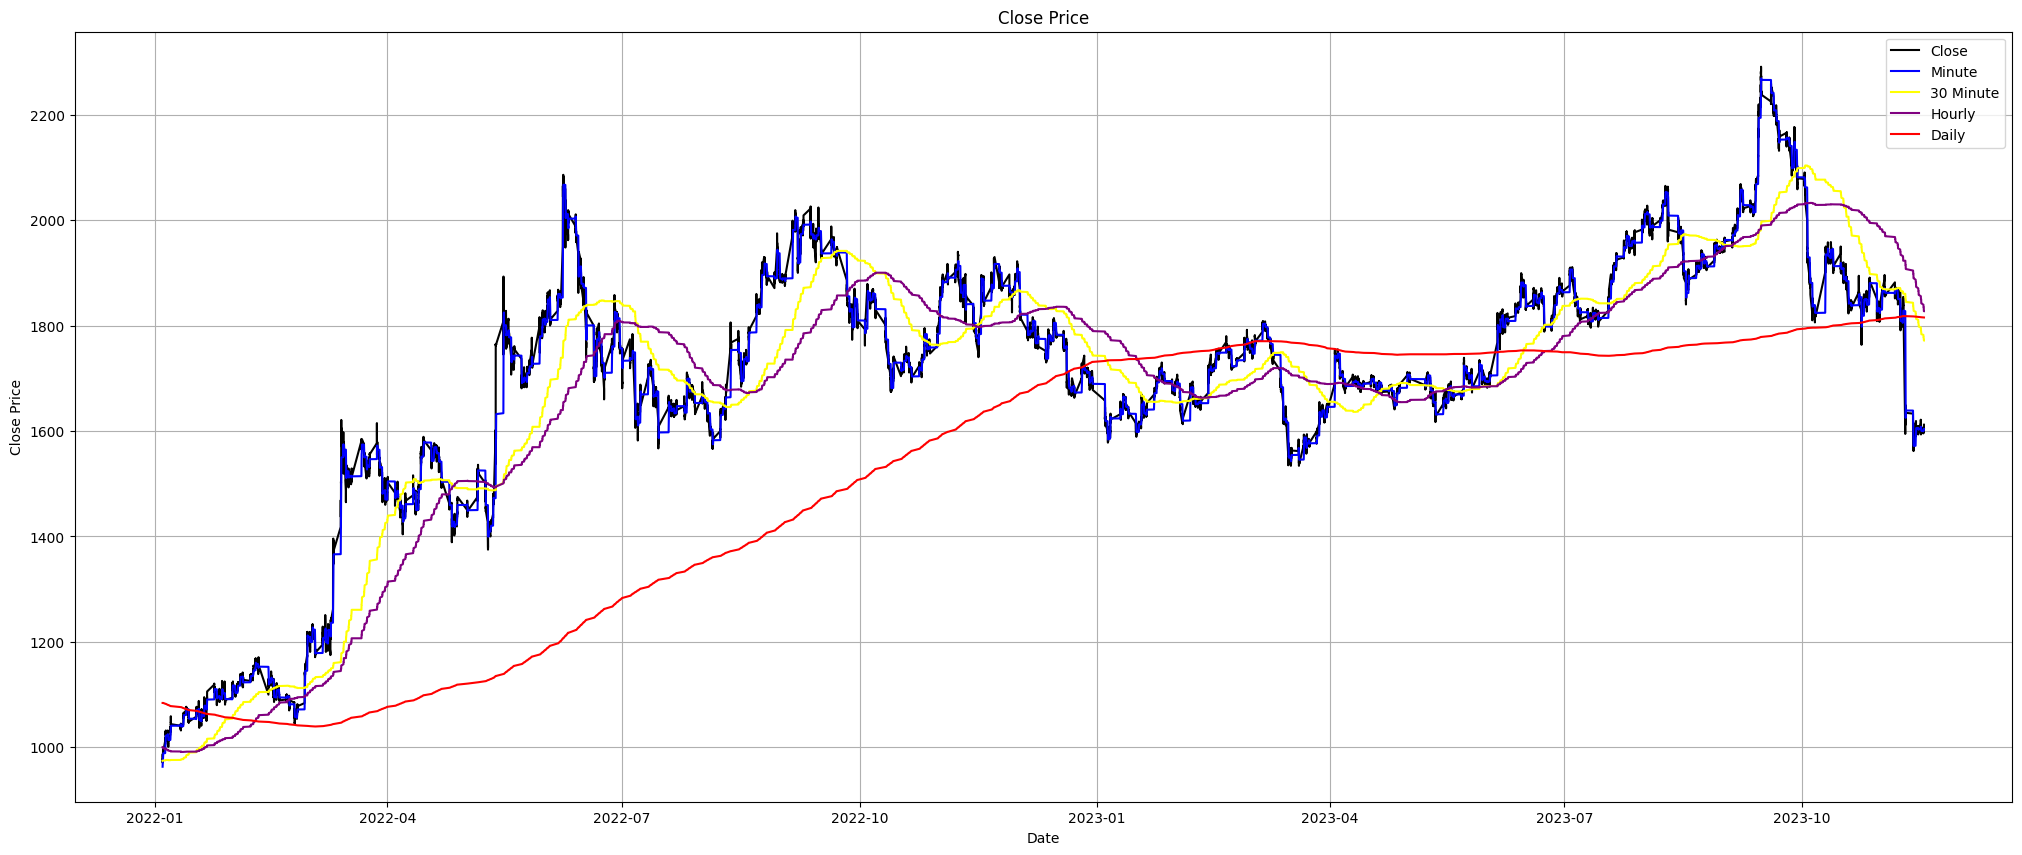

In [84]:

# Assuming 'Date' is a datetime column in your DataFrame
plt.figure(figsize=(25, 10))

# Plot 'Close', '50_MA', and '200_MA'
plt.plot(df['Date'], df['Close'], color = 'black', label='Close')
plt.plot(df['Date'], df['200_MA'], color = 'blue', label='Minute')
plt.plot(df['Date'], df['200_MA_30'], color = 'yellow', label='30 Minute')
plt.plot(df['Date'], df['200_MA_H'], color = 'purple', label='Hourly')
plt.plot(df['Date'], df['200_MA_D'], color = 'red', label='Daily')


# Plot configuration
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close and Moving Average')
plt.grid(True)

# Add legend specifying colors and labels in the top right
legend_elements = [
    Line2D([0], [0], color='black', label='Close'),
    Line2D([0], [0], color='blue', label='Minute'),
    Line2D([0], [0], color='yellow', label='30 Minute'),
    Line2D([0], [0], color='purple', label='Hourly'),
    Line2D([0], [0], color='red', label='Daily')
]
plt.legend(handles=legend_elements, loc='upper right')


# Show plot
plt.show()

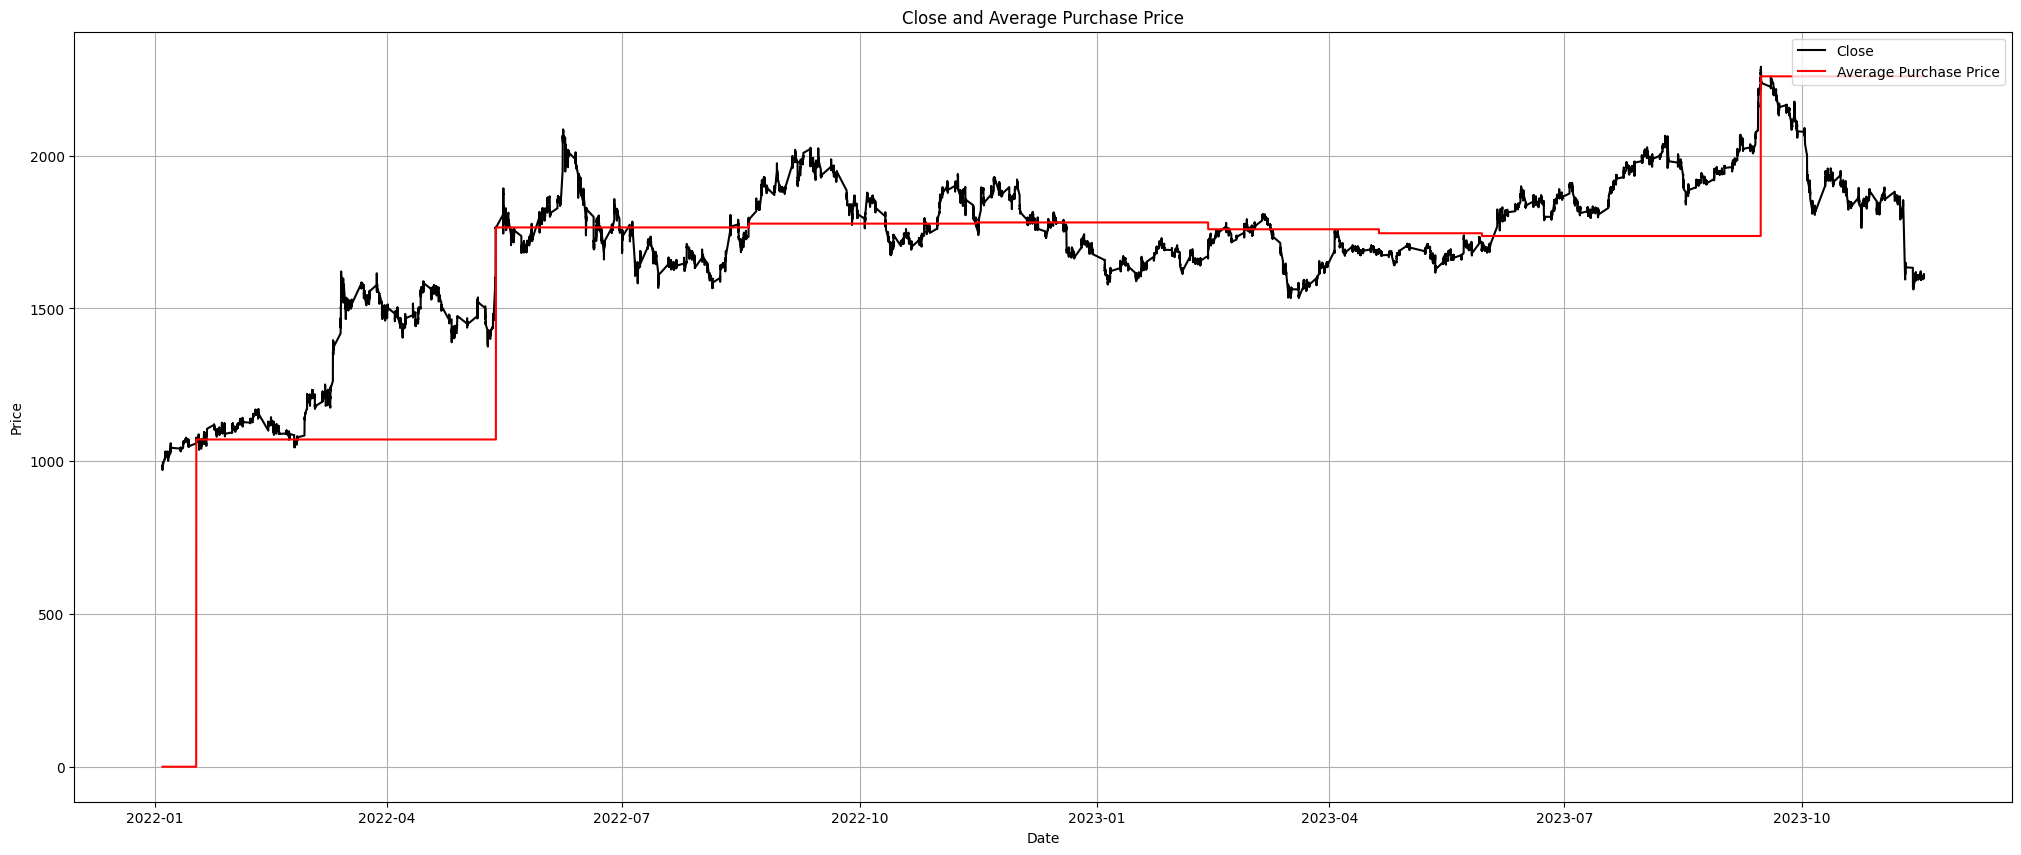

In [85]:

# Assuming 'Date' is a datetime column in your DataFrame
plt.figure(figsize=(25, 10))

# Plot 'Close', '50_MA', and '200_MA'
plt.plot(df['Date'], df['Close'], color = 'black', label='Close')
plt.plot(df['Date'], df['Average Purchase Price'], color = 'red', label='Purchase Price')


# Plot configuration
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close and Average Purchase Price')
plt.grid(True)

# Add legend specifying colors and labels in the top right
legend_elements = [
    Line2D([0], [0], color='black', label='Close'),
    Line2D([0], [0], color='Red', label='Average Purchase Price'),
]
plt.legend(handles=legend_elements, loc='upper right')


# Show plot
plt.show()

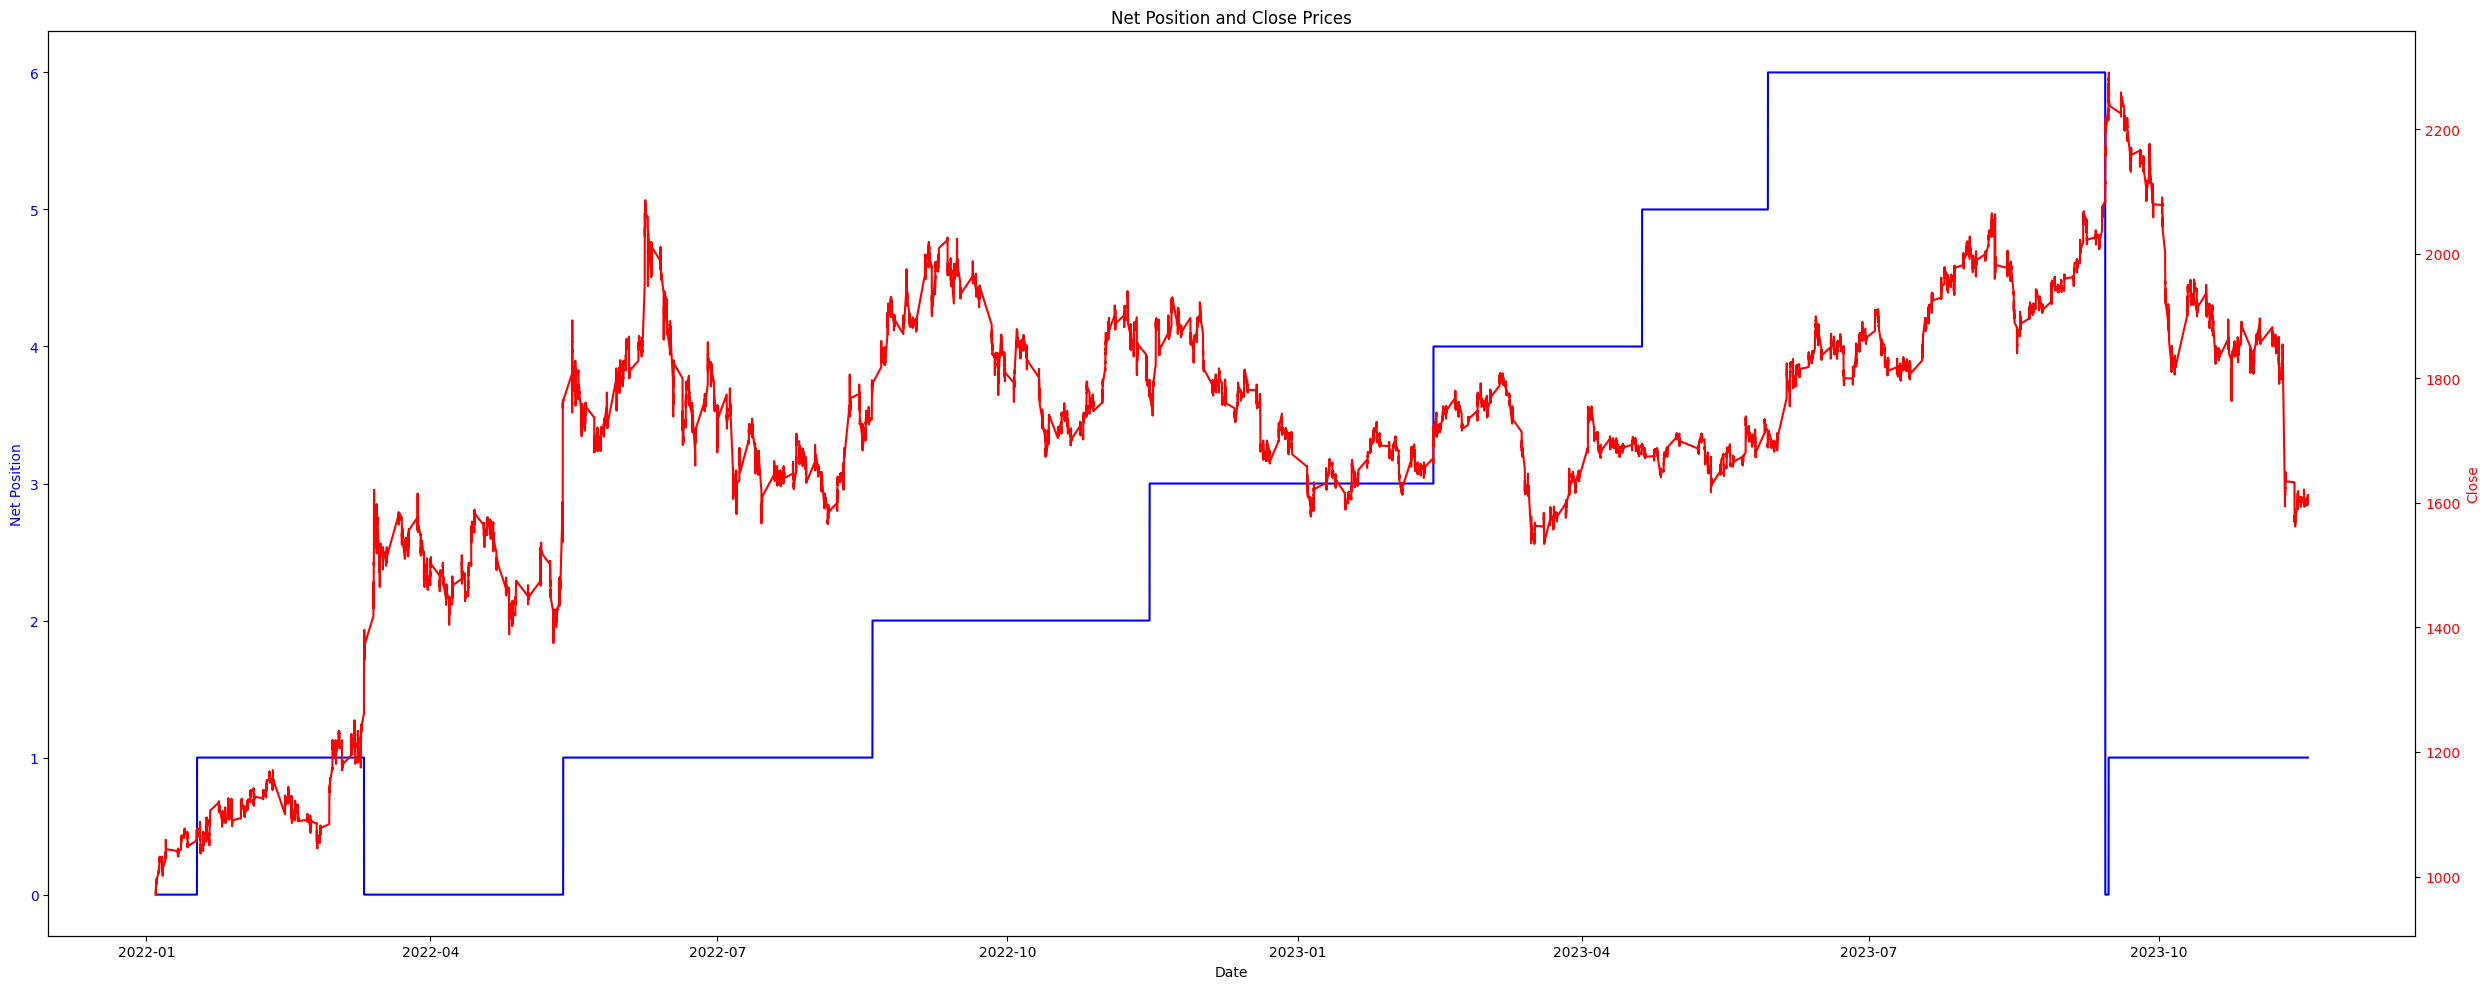

In [78]:

fig, ax1 = plt.subplots(figsize=(25, 10))

# Plot Net Position on the first y-axis (left)
ax1.plot(df['Date'], df['Net Position'], label='Net Position', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Net Position', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis (right) for 'Close'
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Close'], label='Close', color='red')
ax2.set_ylabel('Close', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Net Position and Close Prices')
fig.tight_layout()
plt.show()

In [79]:
#FUNCTION: Strategy Return

def strat_return(input_df, Net_Position_Col ,strat_col_a,strat_col_b, strat_col_c, ts_type):
    
    #Net Position 
    input_df[Net_Position_Col]
   
    #Strategy Value ("xxx SValue")
    input_df[strat_col_a] = 0
    
    #Strategy Return ("xxx SReturn")
    input_df[strat_col_b] = 0

    #Absolute Return ('xxx AbsReturn)
    input_df[strat_col_c] = 0

    
    for i in range(len(input_df)):

        #Daily Return of the Strategy
        input_df.at[i, strat_col_b] = input_df.at[i, 'Return'] * input_df.at[i, Net_Position_Col] 
            
        if ts_type == 'Short':
            input_df.at[i, strat_col_b] = input_df.at[i, strat_col_b] * -1 
                
        #Daily Strategy Value
        if i == 0:
            input_df.at[i, strat_col_a] = 1 * (1 + input_df.at[i, strat_col_b])
        else:
            input_df.at[i, strat_col_a] = input_df.at[i-1, strat_col_a] * (1 + input_df.at[i, strat_col_b])

        #Daily Absoulte Return
        if i == 0:
            input_df.at[i, strat_col_c] = input_df.at[i, strat_col_a] - 1
        else:
            input_df.at[i, strat_col_c] = input_df.at[i, strat_col_a] - 1
    
    input_df.fillna(0, inplace = True)
    


In [80]:

strat_return(df, 'Net Position', 'TS SValue', 'TS SReturn', 'TS AbsReturn', "Long")


The number of entry signal is 8 . The number of exit signal is 12070


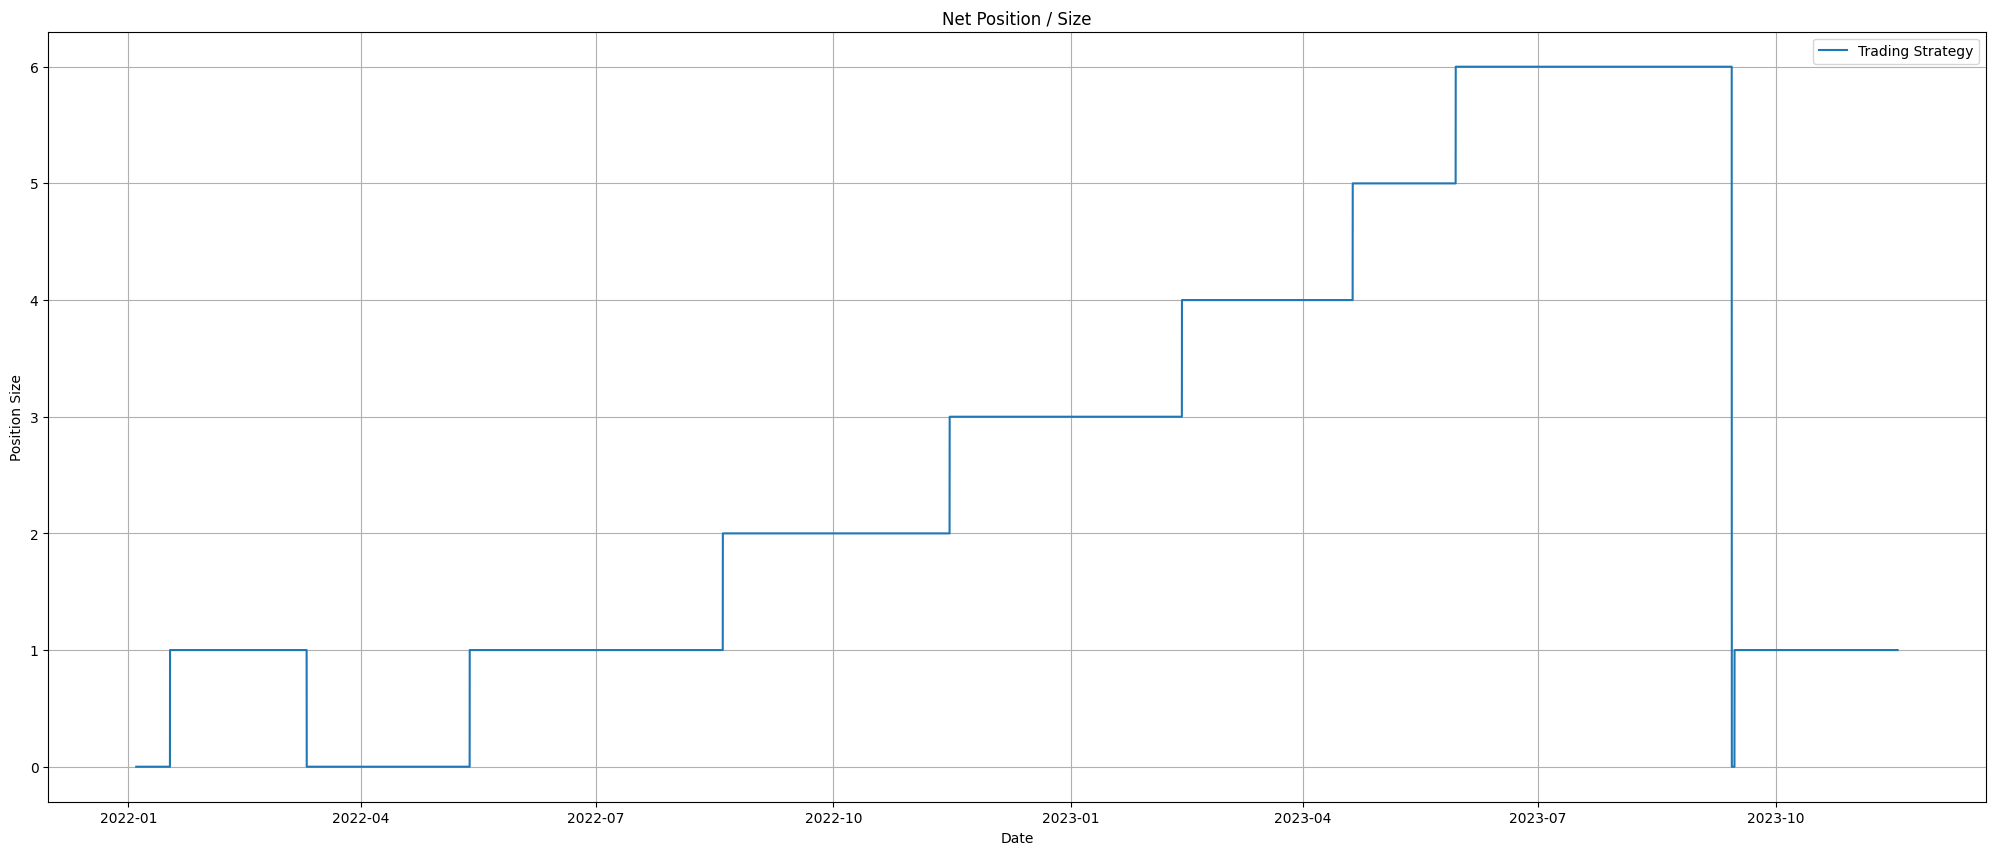

In [81]:
# Assuming 'Date' is a datetime column in your DataFrame

print('The number of entry signal is', df['TS_Entry'].sum(), '. The number of exit signal is', df['TS_Exit'].sum())

plt.figure(figsize=(25, 10))

# Plot TS Absolute and BM Absolute Retruns
plt.plot(df['Date'], df['Net Position'], label='Trading Strategy')


plt.xlabel('Date')
plt.ylabel('Position Size')
plt.title('Net Position / Size')
plt.grid(True)
plt.legend()

x_indices = np.arange(0, len(df), 30)
plt.show()

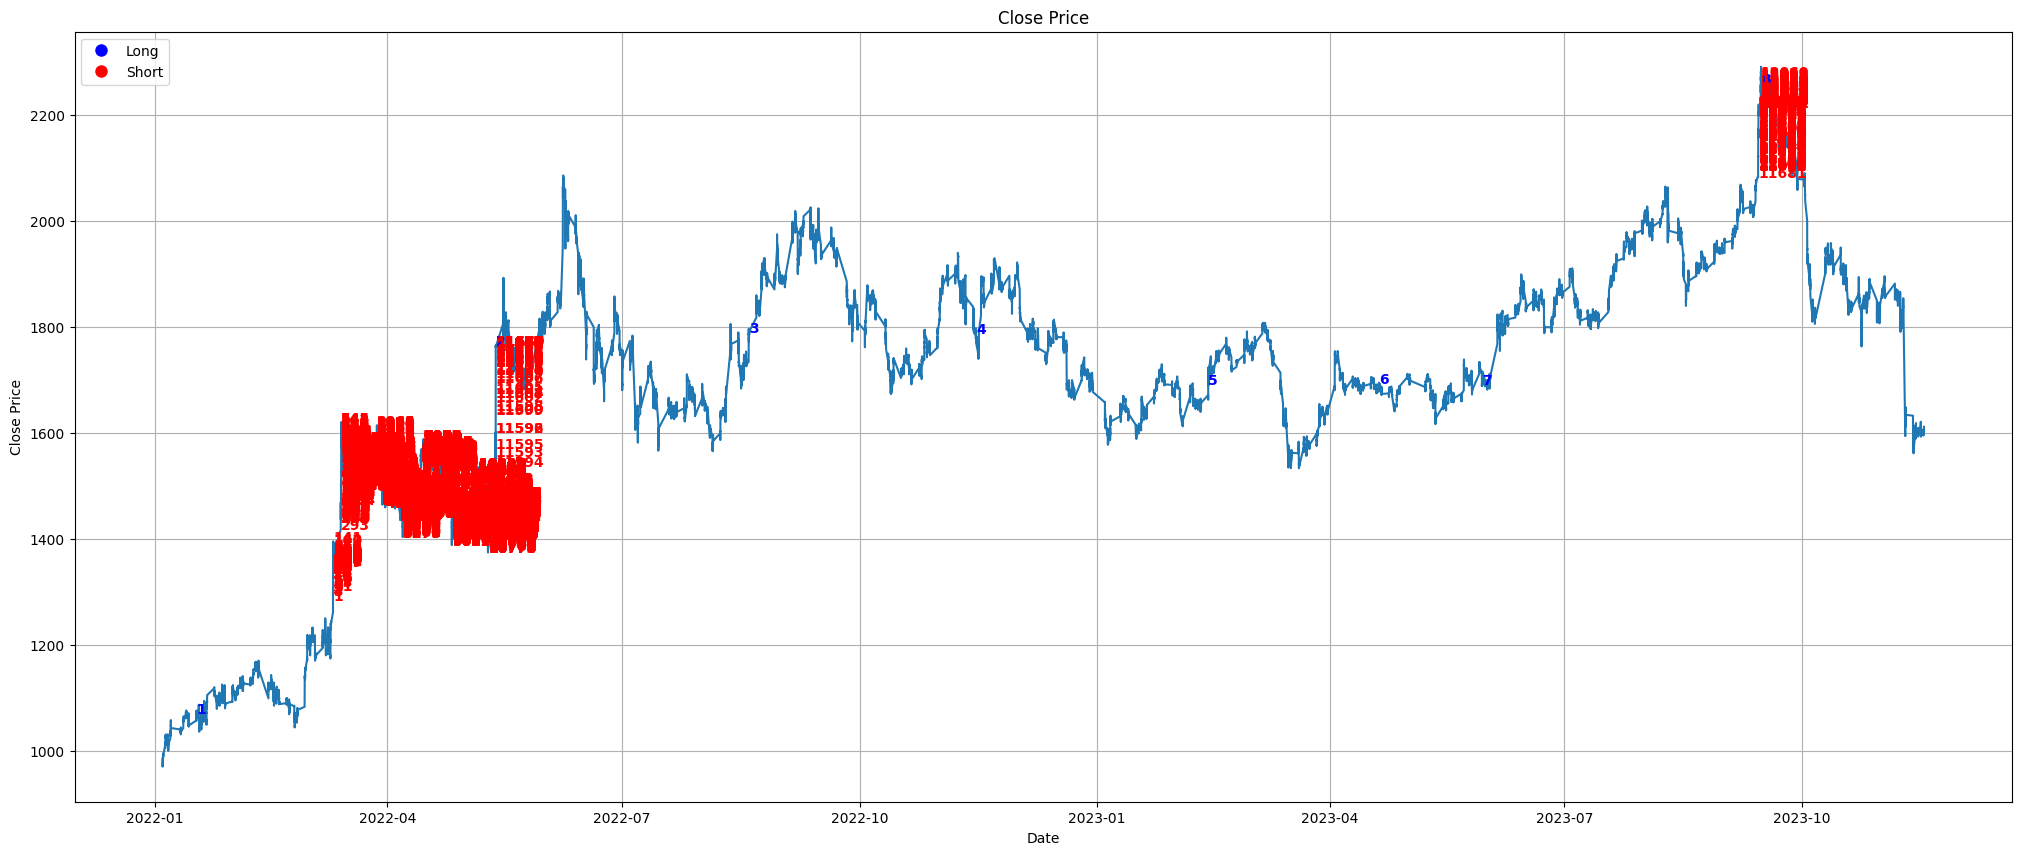

In [82]:
# Assuming 'Date' is a datetime column in your DataFrame


plt.figure(figsize=(25, 10))

# Plot 'TS1 PValue'
plt.plot(df['Date'], df['Close'], label='Close Price')

ts_entry = 0
ts_exit = 0

long_marker = Line2D([0], [0], marker='o', color='w', label='Long',
                     markerfacecolor='blue', markersize=10)
short_marker = Line2D([0], [0], marker='o', color='w', label='Short',
                      markerfacecolor='red', markersize=10)

for i, date in enumerate(df['Date']):
    if df['TS_Entry'].iloc[i] == 1:
        ts_entry += 1
        plt.text(date, df['Close'].iloc[i] + 0.02, str(ts_entry), fontsize=10, color='blue', fontweight='bold')
    if df['TS_Exit'].iloc[i] == 1:
        ts_exit += 1
        plt.text(date, df['Close'].iloc[i] + 0.02, str(ts_exit), fontsize=10, color='red', fontweight='bold')


plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price')
plt.grid(True)
plt.legend()

legend_elements = [long_marker, short_marker]
plt.legend(handles=legend_elements, loc='upper left')

x_indices = np.arange(0, len(df), 30)
plt.show()

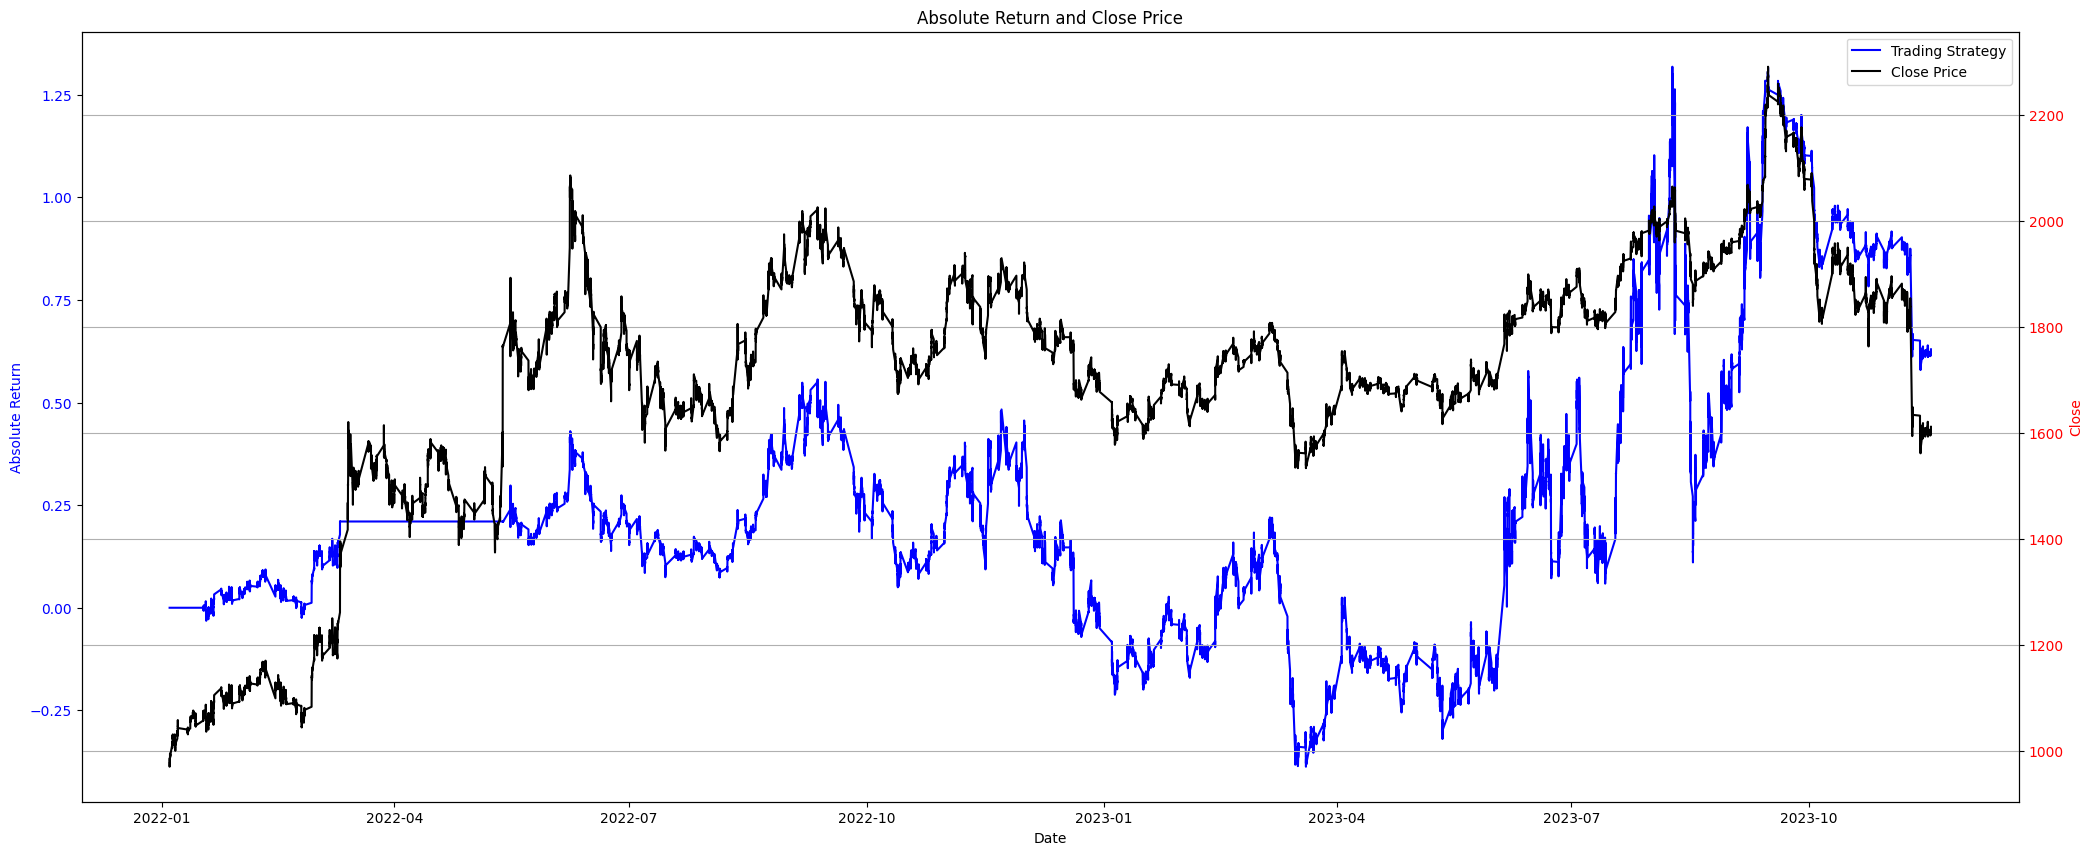

In [83]:
# Assuming 'Date' is a datetime column in your DataFrame
fig, ax1 = plt.subplots(figsize=(25, 10))

# Plot 'TS AbsReturn'
ax1.plot(df['Date'], df['TS AbsReturn'], label='Minute Trading Strategy', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Absolute Return', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for 'Close'
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Close'], label='Close', color='black')
ax2.set_ylabel('Close', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Absolute Return and Close Price')
plt.grid(True)
plt.legend()

# Add legend specifying colors and labels in the top right
legend_elements = [
    Line2D([0], [0], color='blue', label='Trading Strategy'),
    Line2D([0], [0], color='black', label='Close Price'),
]
plt.legend(handles=legend_elements, loc='upper right')

x_indices = np.arange(0, len(df), 30)
plt.show()


In [ ]:
EUA

APA

PBF

Patterson - 20%/40%

Halliburton


NEE


AES


In [ ]:
Exit signal

Up 10% /20%